In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/blinkit-sales-dataset/blinkit_customer_feedback.csv
/kaggle/input/blinkit-sales-dataset/blinkit_customers.csv
/kaggle/input/blinkit-sales-dataset/blinkit_order_items.csv
/kaggle/input/blinkit-sales-dataset/Category_Icons.xlsx
/kaggle/input/blinkit-sales-dataset/blinkit_inventory.csv
/kaggle/input/blinkit-sales-dataset/blinkit_delivery_performance.csv
/kaggle/input/blinkit-sales-dataset/Rating_Icon.xlsx
/kaggle/input/blinkit-sales-dataset/blinkit_inventoryNew.csv
/kaggle/input/blinkit-sales-dataset/blinkit_orders.csv
/kaggle/input/blinkit-sales-dataset/blinkit_marketing_performance.csv
/kaggle/input/blinkit-sales-dataset/blinkit_products.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("/kaggle/input/blinkit-sales-dataset/blinkit_products.csv")

In [4]:
df.head()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55


In [5]:
df.tail()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
263,444361,Pain Reliever,Pharmacy,"Prakash, Bawa and Kale",822.63,1028.29,20.0,365,20,71
264,679284,Cough Syrup,Pharmacy,Pant LLC,877.89,1097.36,20.0,365,28,95
265,240179,Cough Syrup,Pharmacy,Ram-Suri,90.56,113.20,20.0,365,20,56
266,673058,Cough Syrup,Pharmacy,Balan-Madan,765.76,957.20,20.0,365,30,94
267,114414,Vitamins,Pharmacy,Kara-Golla,832.06,1040.07,20.0,365,26,66


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         268 non-null    int64  
 1   product_name       268 non-null    object 
 2   category           268 non-null    object 
 3   brand              268 non-null    object 
 4   price              268 non-null    float64
 5   mrp                268 non-null    float64
 6   margin_percentage  268 non-null    float64
 7   shelf_life_days    268 non-null    int64  
 8   min_stock_level    268 non-null    int64  
 9   max_stock_level    268 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 21.1+ KB


In [7]:
df.describe()

,product_id,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
count,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,514855.940299,488.356828,680.434739,27.779851,231.757463,20.388060,74.753731
std,291391.529820,298.487200,419.772224,7.458753,151.205830,5.958546,14.591535
min,4452.000000,12.320000,17.600000,15.000000,3.000000,10.000000,50.000000
25%,273697.750000,226.717500,325.150000,20.000000,90.000000,15.000000,63.750000
50%,541459.000000,442.185000,616.970000,30.000000,365.000000,21.000000,73.000000
75%,754334.000000,779.445000,1056.620000,35.000000,365.000000,25.250000,88.000000
max,993331.000000,995.980000,1633.320000,40.000000,365.000000,30.000000,100.000000


In [8]:
df.dtypes

product_id             int64
product_name          object
category              object
brand                 object
price                float64
mrp                  float64
margin_percentage    float64
shelf_life_days        int64
min_stock_level        int64
max_stock_level        int64
dtype: object

In [9]:
df.isnull().sum()

product_id           0
product_name         0
category             0
brand                0
price                0
mrp                  0
margin_percentage    0
shelf_life_days      0
min_stock_level      0
max_stock_level      0
dtype: int64

In [10]:
df.columns

Index(['product_id', 'product_name', 'category', 'brand', 'price', 'mrp',
       'margin_percentage', 'shelf_life_days', 'min_stock_level',
       'max_stock_level'],
      dtype='object')

**Data Cleaning and Preparation**


**Customer data cleaning**

In [11]:
customer_df = pd.read_csv("/kaggle/input/blinkit-sales-dataset/blinkit_customers.csv")
customer_df["registration_date"] = pd.to_datetime(customer_df["registration_date"])
customer_df.dropna(inplace=True)
customer_df["phone"] = customer_df["phone"].astype(str).str.strip()
customer_df["email"] = customer_df["email"].str.strip()
customer_df["area"] = customer_df["area"].str.strip()

In [12]:
customer_df.head()

,customer_id,customer_name,email,phone,address,area,pincode,registration_date,customer_segment,total_orders,avg_order_value
0,97475543,Niharika Nagi,ektataneja@example.org,912987579691,"23, Nayar Path, Bihar Sharif-154625",Udupi,321865,2023-05-13,Premium,13,451.92
1,22077605,Megha Sachar,vedant45@example.com,915123179717,"51/302, Buch Chowk\nSrinagar-570271",Aligarh,149394,2024-06-18,Inactive,4,825.48
2,47822591,Hema Bahri,samiazaan@example.com,910034076149,"941\nAnne Street, Darbhanga 186125",Begusarai,621411,2024-09-25,Regular,17,1969.81
3,79726146,Zaitra Vig,ishanvi87@example.org,916264232390,"43/94, Ghosh, Alappuzha 635655",Kozhikode,826054,2023-10-04,New,4,220.09
4,57102800,Januja Verma,atideshpande@example.org,917293526596,"06\nOm, Ambarnath 477463",Ichalkaranji,730539,2024-03-22,Inactive,14,578.14


In [13]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        2500 non-null   int64         
 1   customer_name      2500 non-null   object        
 2   email              2500 non-null   object        
 3   phone              2500 non-null   object        
 4   address            2500 non-null   object        
 5   area               2500 non-null   object        
 6   pincode            2500 non-null   int64         
 7   registration_date  2500 non-null   datetime64[ns]
 8   customer_segment   2500 non-null   object        
 9   total_orders       2500 non-null   int64         
 10  avg_order_value    2500 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 215.0+ KB


**Order data cleaning**

In [14]:
orders_df = pd.read_csv("/kaggle/input/blinkit-sales-dataset/blinkit_orders.csv")
orders_df["order_date"] = pd.to_datetime(orders_df["order_date"])
orders_df["promised_delivery_time"] = pd.to_datetime(orders_df["promised_delivery_time"])
orders_df["actual_delivery_time"] = pd.to_datetime(orders_df["actual_delivery_time"])
orders_df.dropna(inplace=True)
orders_df = orders_df[orders_df["order_total"] > 0]

In [15]:
orders_df.head()

,order_id,customer_id,order_date,promised_delivery_time,actual_delivery_time,delivery_status,order_total,payment_method,delivery_partner_id,store_id
0,1961864118,30065862,2024-07-17 08:34:01,2024-07-17 08:52:01,2024-07-17 08:47:01,On Time,3197.07,Cash,63230,4771
1,1549769649,9573071,2024-05-28 13:14:29,2024-05-28 13:25:29,2024-05-28 13:27:29,On Time,976.55,Cash,14983,7534
2,9185164487,45477575,2024-09-23 13:07:12,2024-09-23 13:25:12,2024-09-23 13:29:12,On Time,839.05,UPI,39859,9886
3,9644738826,88067569,2023-11-24 16:16:56,2023-11-24 16:34:56,2023-11-24 16:33:56,On Time,440.23,Card,61497,7917
4,5427684290,83298567,2023-11-20 05:00:39,2023-11-20 05:17:39,2023-11-20 05:18:39,On Time,2526.68,Cash,84315,2741


In [16]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   order_id                5000 non-null   int64         
 1   customer_id             5000 non-null   int64         
 2   order_date              5000 non-null   datetime64[ns]
 3   promised_delivery_time  5000 non-null   datetime64[ns]
 4   actual_delivery_time    5000 non-null   datetime64[ns]
 5   delivery_status         5000 non-null   object        
 6   order_total             5000 non-null   float64       
 7   payment_method          5000 non-null   object        
 8   delivery_partner_id     5000 non-null   int64         
 9   store_id                5000 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(4), object(2)
memory usage: 390.8+ KB


**Delivery performance cleaning**

In [17]:
delivery_df = pd.read_csv("/kaggle/input/blinkit-sales-dataset/blinkit_delivery_performance.csv")
delivery_df["promised_time"] = pd.to_datetime(delivery_df["promised_time"])
delivery_df["actual_time"] = pd.to_datetime(delivery_df["actual_time"])
delivery_df["delivery_time_minutes"] = (delivery_df["actual_time"] - delivery_df["promised_time"]).dt.total_seconds() / 60
delivery_df.fillna("Unknown", inplace=True) 
delivery_df = delivery_df[delivery_df["distance_km"] >= 0]

In [18]:
delivery_df.head()

,order_id,delivery_partner_id,promised_time,actual_time,delivery_time_minutes,distance_km,delivery_status,reasons_if_delayed
0,1961864118,63230,2024-07-17 08:52:01,2024-07-17 08:47:01,-5.0,0.96,On Time,Unknown
1,1549769649,14983,2024-05-28 13:25:29,2024-05-28 13:27:29,2.0,0.98,On Time,Traffic
2,9185164487,39859,2024-09-23 13:25:12,2024-09-23 13:29:12,4.0,3.83,On Time,Traffic
3,9644738826,61497,2023-11-24 16:34:56,2023-11-24 16:33:56,-1.0,2.76,On Time,Unknown
4,5427684290,84315,2023-11-20 05:17:39,2023-11-20 05:18:39,1.0,2.63,On Time,Traffic


In [19]:
delivery_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   order_id               5000 non-null   int64         
 1   delivery_partner_id    5000 non-null   int64         
 2   promised_time          5000 non-null   datetime64[ns]
 3   actual_time            5000 non-null   datetime64[ns]
 4   delivery_time_minutes  5000 non-null   float64       
 5   distance_km            5000 non-null   float64       
 6   delivery_status        5000 non-null   object        
 7   reasons_if_delayed     5000 non-null   object        
dtypes: datetime64[ns](2), float64(2), int64(2), object(2)
memory usage: 312.6+ KB


**Product data cleaning**

In [20]:
products_df = pd.read_csv("/kaggle/input/blinkit-sales-dataset/blinkit_products.csv")
products_df.dropna(inplace=True)
products_df = products_df[products_df["price"] >= 0]

In [21]:
products_df.head()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
0,153019,Onions,Fruits & Vegetables,Aurora LLC,947.95,1263.93,25.0,3,13,88
1,11422,Potatoes,Fruits & Vegetables,Ramaswamy-Tata,127.16,169.55,25.0,3,20,65
2,669378,Potatoes,Fruits & Vegetables,Chadha and Sons,212.14,282.85,25.0,3,23,70
3,848226,Tomatoes,Fruits & Vegetables,Barad and Sons,209.59,279.45,25.0,3,10,51
4,890623,Onions,Fruits & Vegetables,"Sangha, Nagar and Varty",354.52,472.69,25.0,3,27,55


In [22]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268 entries, 0 to 267
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   product_id         268 non-null    int64  
 1   product_name       268 non-null    object 
 2   category           268 non-null    object 
 3   brand              268 non-null    object 
 4   price              268 non-null    float64
 5   mrp                268 non-null    float64
 6   margin_percentage  268 non-null    float64
 7   shelf_life_days    268 non-null    int64  
 8   min_stock_level    268 non-null    int64  
 9   max_stock_level    268 non-null    int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 21.1+ KB


**Marketing campaign data cleaning**

In [23]:
marketing_df = pd.read_csv("/kaggle/input/blinkit-sales-dataset/blinkit_marketing_performance.csv")
marketing_df["date"] = pd.to_datetime(marketing_df["date"])
marketing_df.dropna(inplace=True) 
marketing_df = marketing_df[marketing_df["roas"] > 0]

In [24]:
marketing_df.head()

,campaign_id,campaign_name,date,target_audience,channel,impressions,clicks,conversions,spend,revenue_generated,roas
0,548299,New User Discount,2024-11-05,Premium,App,3130,163,78,1431.85,4777.75,3.60
1,390914,Weekend Special,2024-11-05,Inactive,App,3925,494,45,4506.34,6238.11,2.98
2,834385,Festival Offer,2024-11-05,Inactive,Email,7012,370,78,4524.23,2621.00,2.95
3,241523,Flash Sale,2024-11-05,Inactive,SMS,1115,579,86,3622.79,2955.00,2.84
4,595111,Membership Drive,2024-11-05,New Users,Email,7172,795,54,2888.99,8951.81,2.22


In [25]:
marketing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5400 entries, 0 to 5399
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   campaign_id        5400 non-null   int64         
 1   campaign_name      5400 non-null   object        
 2   date               5400 non-null   datetime64[ns]
 3   target_audience    5400 non-null   object        
 4   channel            5400 non-null   object        
 5   impressions        5400 non-null   int64         
 6   clicks             5400 non-null   int64         
 7   conversions        5400 non-null   int64         
 8   spend              5400 non-null   float64       
 9   revenue_generated  5400 non-null   float64       
 10  roas               5400 non-null   float64       
dtypes: datetime64[ns](1), float64(3), int64(4), object(3)
memory usage: 464.2+ KB


**Inventory data cleaning**

In [26]:
inventory_df = pd.read_csv("/kaggle/input/blinkit-sales-dataset/blinkit_inventory.csv")
inventory_df.dropna(inplace=True)  
inventory_df = inventory_df[inventory_df["stock_received"] >= 0] 

In [27]:
inventory_df.head()

,product_id,date,stock_received,damaged_stock
0,153019,17-03-2023,4,2
1,848226,17-03-2023,4,2
2,965755,17-03-2023,1,0
3,39154,17-03-2023,4,0
4,34186,17-03-2023,3,2


In [28]:
inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75172 entries, 0 to 75171
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      75172 non-null  int64 
 1   date            75172 non-null  object
 2   stock_received  75172 non-null  int64 
 3   damaged_stock   75172 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 2.3+ MB


**Customer feedback data cleaning**

In [29]:
feedback_df = pd.read_csv("/kaggle/input/blinkit-sales-dataset/blinkit_customer_feedback.csv")
feedback_df["feedback_date"] = pd.to_datetime(feedback_df["feedback_date"])
feedback_df.dropna(inplace=True) 

In [30]:
feedback_df.head()

,feedback_id,order_id,customer_id,rating,feedback_text,feedback_category,sentiment,feedback_date
0,2234710,1961864118,30065862,4,"It was okay, nothing special.",Delivery,Neutral,2024-07-17
1,5450964,1549769649,9573071,3,The order was incorrect.,App Experience,Negative,2024-05-28
2,482108,9185164487,45477575,3,"It was okay, nothing special.",App Experience,Neutral,2024-09-23
3,4823104,9644738826,88067569,4,The product met my expectations.,App Experience,Neutral,2023-11-24
4,3537464,5427684290,83298567,3,Product was damaged during delivery.,Delivery,Negative,2023-11-20


In [31]:
feedback_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   feedback_id        5000 non-null   int64         
 1   order_id           5000 non-null   int64         
 2   customer_id        5000 non-null   int64         
 3   rating             5000 non-null   int64         
 4   feedback_text      5000 non-null   object        
 5   feedback_category  5000 non-null   object        
 6   sentiment          5000 non-null   object        
 7   feedback_date      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 312.6+ KB


**Order items data cleaning**

In [32]:
order_items_df = pd.read_csv("/kaggle/input/blinkit-sales-dataset/blinkit_order_items.csv")
order_items_df.dropna(inplace=True)
order_items_df = order_items_df[order_items_df["quantity"] > 0]

In [33]:
order_items_df.head()

,order_id,product_id,quantity,unit_price
0,1961864118,642612,3,517.03
1,1549769649,378676,1,881.42
2,9185164487,741341,2,923.84
3,9644738826,561860,1,874.78
4,5427684290,602241,2,976.55


In [34]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   order_id    5000 non-null   int64  
 1   product_id  5000 non-null   int64  
 2   quantity    5000 non-null   int64  
 3   unit_price  5000 non-null   float64
dtypes: float64(1), int64(3)
memory usage: 156.4 KB


**New inventory data cleaning**

In [35]:
inventory_new_df = pd.read_csv("/kaggle/input/blinkit-sales-dataset/blinkit_inventoryNew.csv")
inventory_new_df.dropna(inplace=True)
inventory_new_df = inventory_new_df[inventory_new_df["stock_received"] >= 0]

In [36]:
inventory_new_df.head()

,product_id,date,stock_received,damaged_stock
0,153019,Mar-23,4,1
1,848226,Mar-23,4,1
2,965755,Mar-23,1,0
3,39154,Mar-23,4,0
4,34186,Mar-23,3,1


In [37]:
inventory_new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18105 entries, 0 to 18104
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   product_id      18105 non-null  int64 
 1   date            18105 non-null  object
 2   stock_received  18105 non-null  int64 
 3   damaged_stock   18105 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 565.9+ KB


**Category icons data cleaning**

In [38]:
category_icons_df = pd.read_excel("/kaggle/input/blinkit-sales-dataset/Category_Icons.xlsx")
category_icons_df.dropna(inplace=True)
category_icons_df["category"] = category_icons_df["category"].str.strip()

In [39]:
category_icons_df.head()

,category,Img
0,Grocery & Staples,https://i.postimg.cc/jSc7fmbs/grocery.png
1,Household Care,https://i.postimg.cc/1tnnLzNt/cleaning-tools.png
2,Personal Care,https://i.postimg.cc/hvmm7GSw/personal-care.png
3,Baby Care,https://i.postimg.cc/k55tvsJW/feeding.png
4,Pet Care,https://i.postimg.cc/FRMdmQjx/pet-food.png


In [40]:
category_icons_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  11 non-null     object
 1   Img       11 non-null     object
dtypes: object(2)
memory usage: 304.0+ bytes


**Data Visualization**

In [41]:
# Set plot style
sns.set_style("whitegrid")
plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 14
plt.rcParams["xtick.labelsize"] = 10
plt.rcParams["ytick.labelsize"] = 10

**1. Customer Registration Distribution**

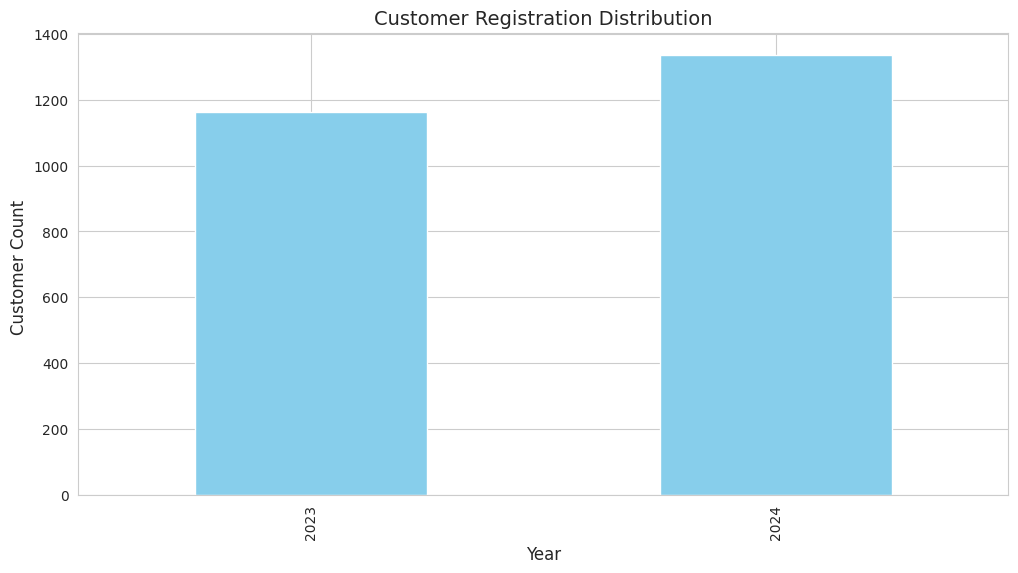

In [42]:
plt.figure(figsize=(12,6))
customer_df["registration_date"].dt.year.value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Customer Registration Distribution")
plt.xlabel("Year")
plt.ylabel("Customer Count ")
plt.show()

**2. Daily Orders Trend**

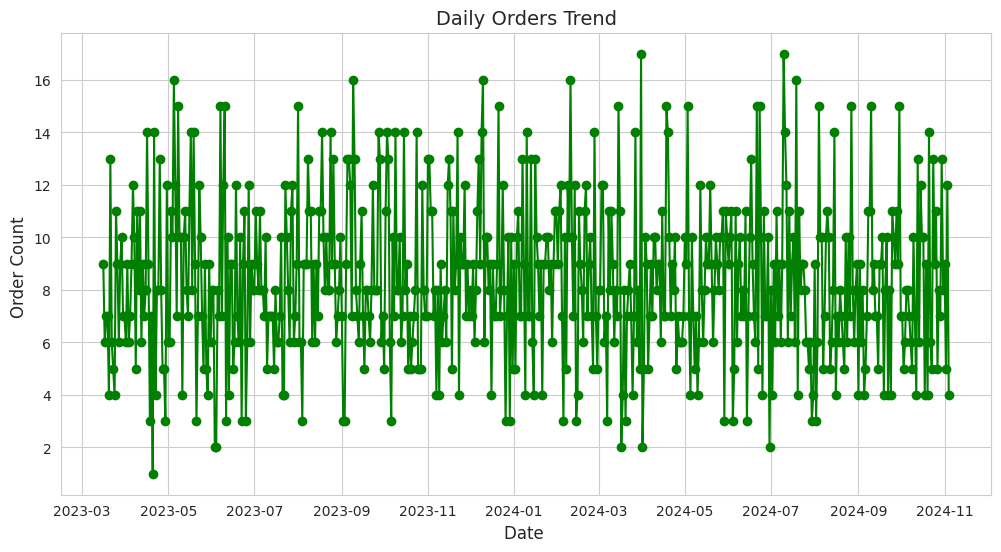

In [43]:
plt.figure(figsize=(12,6))
orders_df.groupby(orders_df["order_date"].dt.date).size().plot(kind="line", marker="o", color="green")
plt.title("Daily Orders Trend")
plt.xlabel("Date ")
plt.ylabel("Order Count ")
plt.show()

**3. Orders by Hour**

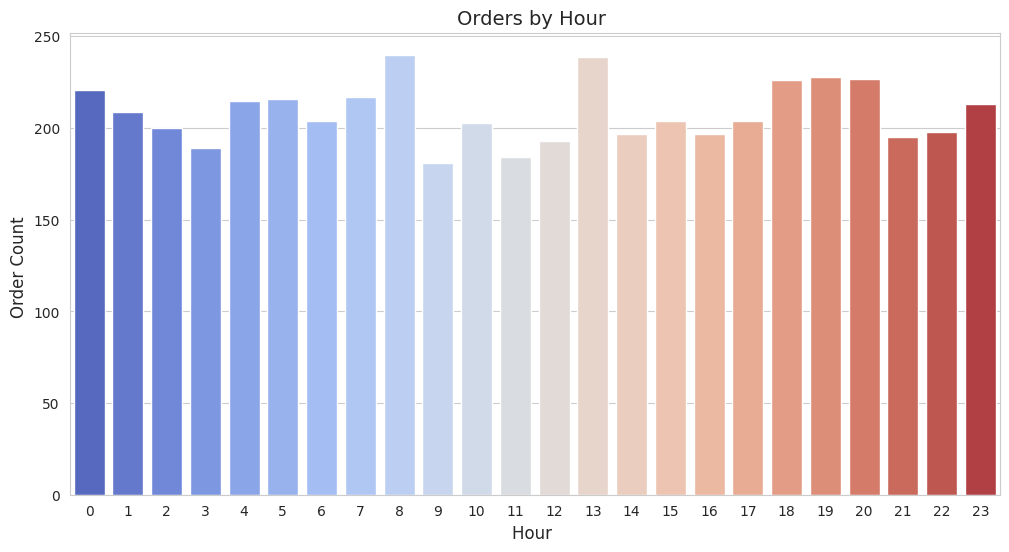

In [44]:
plt.figure(figsize=(12,6))
orders_df["hour"] = pd.to_datetime(orders_df["order_date"]).dt.hour
sns.countplot(x=orders_df["hour"], palette="coolwarm")
plt.title("Orders by Hour ")
plt.xlabel("Hour ")
plt.ylabel("Order Count ")
plt.show()

**4. Orders by Area**

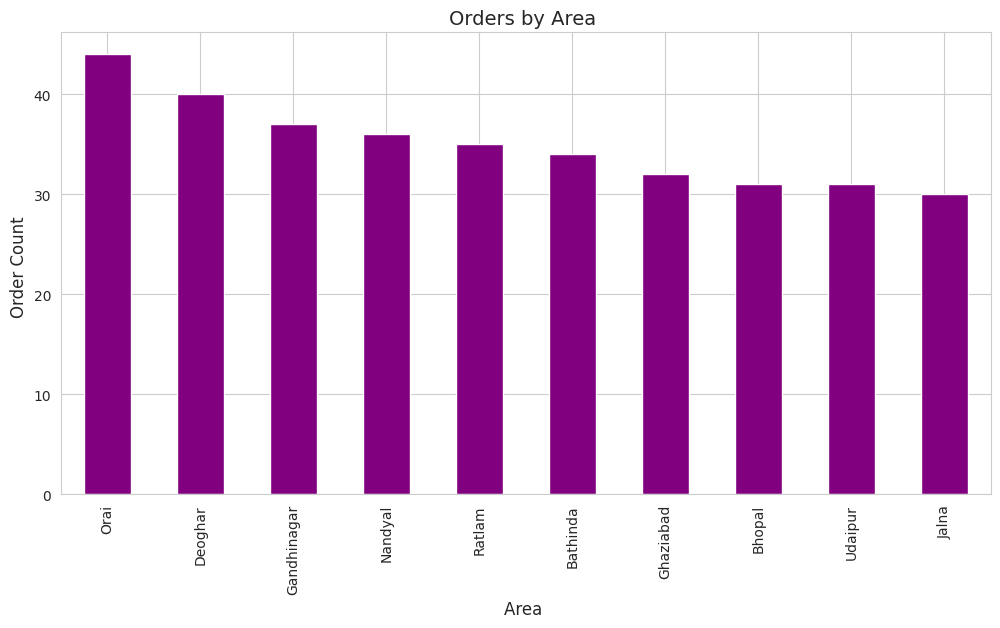

In [45]:
plt.figure(figsize=(12,6))
customer_orders = orders_df.merge(customer_df, on="customer_id", how="left")
customer_orders["area"].value_counts().nlargest(10).plot(kind="bar", color="purple")
plt.title("Orders by Area ")
plt.xlabel("Area ")
plt.ylabel("Order Count ")
plt.show()

**5. Customer Segmentation**

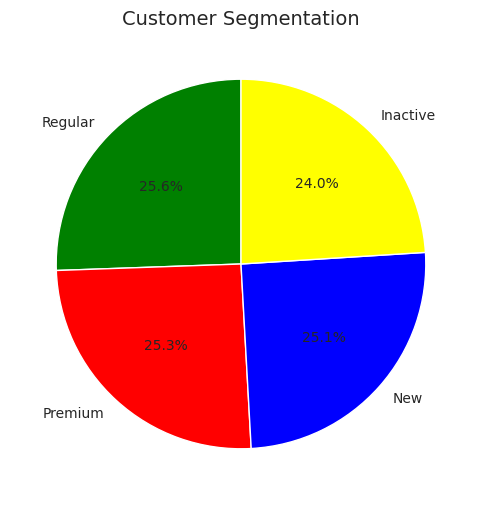

In [46]:
plt.figure(figsize=(12,6))
customer_df["customer_segment"].value_counts().plot(kind="pie", autopct='%1.1f%%', colors=["green", "red", "blue", "yellow"], startangle=90)
plt.title("Customer Segmentation")
plt.ylabel("")
plt.show()

**6. Sales by Product Category**

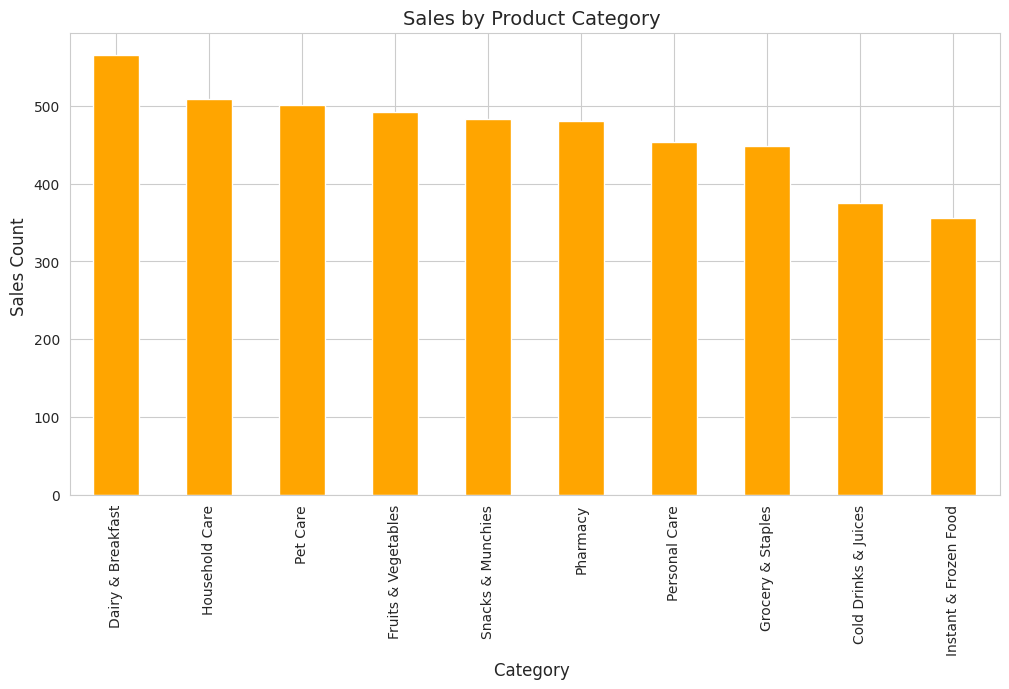

In [47]:
plt.figure(figsize=(12,6))
product_sales = order_items_df.merge(products_df, on="product_id", how="left")
product_sales["category"].value_counts().nlargest(10).plot(kind="bar", color="orange")
plt.title("Sales by Product Category ")
plt.xlabel("Category ")
plt.ylabel("Sales Count ")
plt.show()

**7.Delivery Distance Distribution**

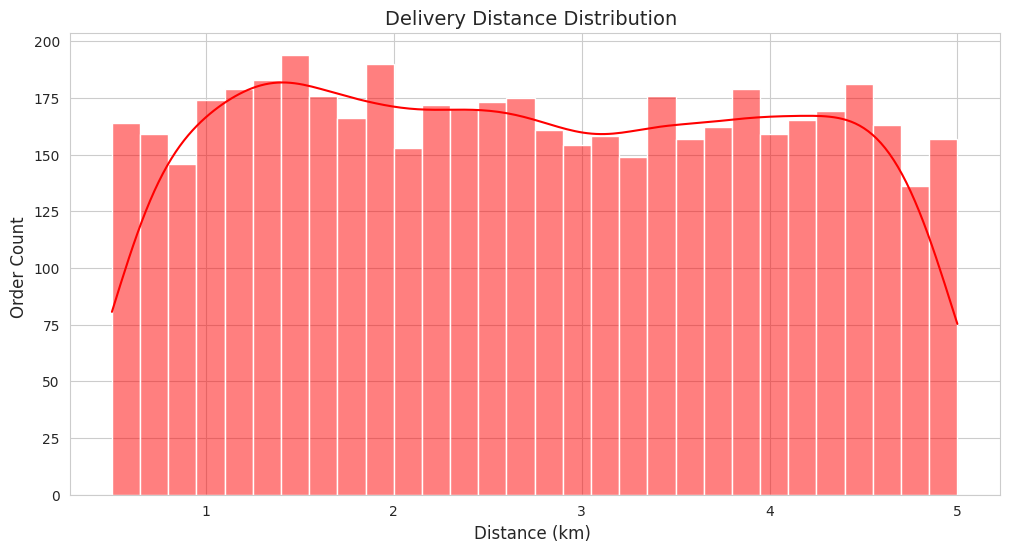

In [48]:
plt.figure(figsize=(12,6))
sns.histplot(delivery_df["distance_km"], bins=30, kde=True, color="red")
plt.title("Delivery Distance Distribution ")
plt.xlabel("Distance (km) ")
plt.ylabel("Order Count ")
plt.show()

**8.Orders by Day of Week**

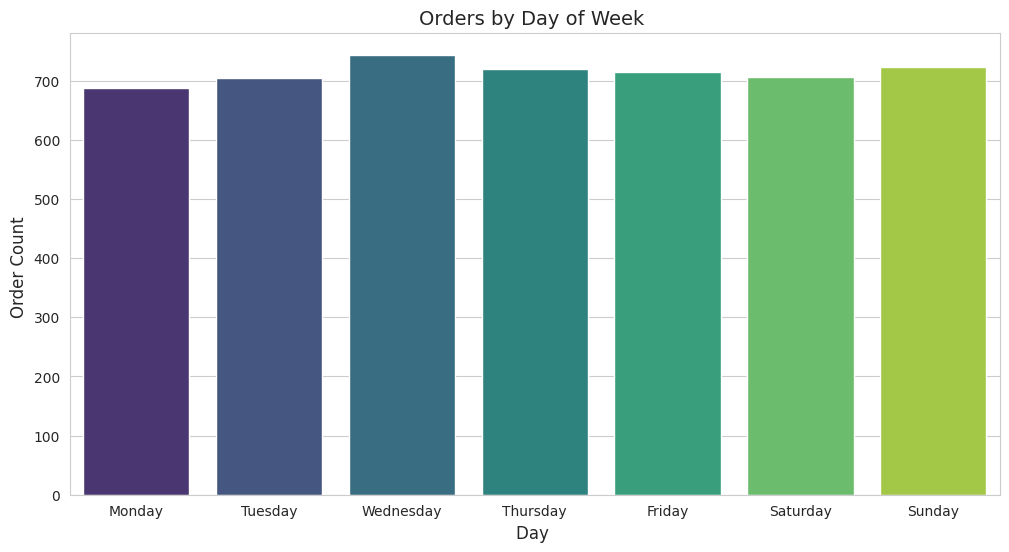

In [49]:
plt.figure(figsize=(12,6))
orders_df["day_of_week"] = pd.to_datetime(orders_df["order_date"]).dt.day_name()
sns.countplot(x=orders_df["day_of_week"], order=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], palette="viridis")
plt.title("Orders by Day of Week ")
plt.xlabel("Day ")
plt.ylabel("Order Count ")
plt.show()

**9.Orders by Season**

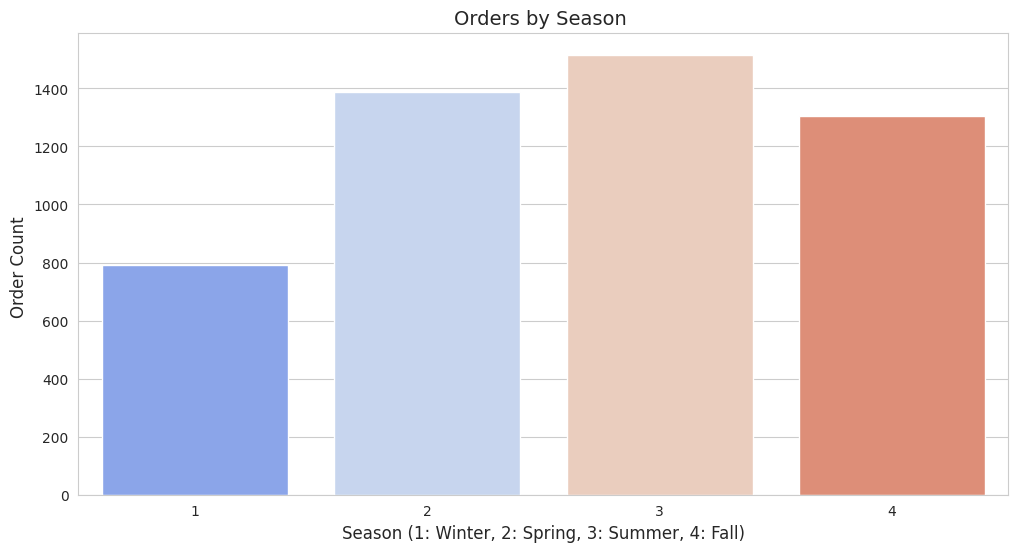

In [50]:
plt.figure(figsize=(12,6))
orders_df["season"] = orders_df["order_date"].dt.month % 12 // 3 + 1
sns.countplot(x=orders_df["season"], palette="coolwarm")
plt.title("Orders by Season ")
plt.xlabel("Season (1: Winter, 2: Spring, 3: Summer, 4: Fall)")
plt.ylabel("Order Count ")
plt.show()

10.Stok Hasar Oranı Analizi

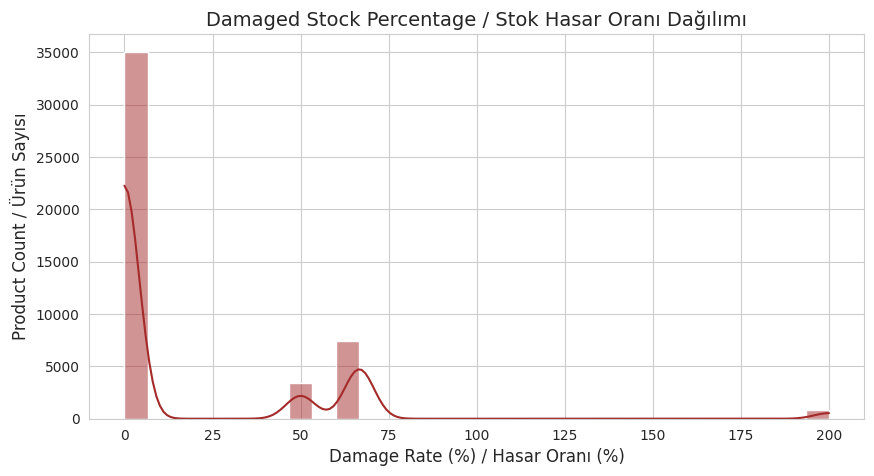

In [51]:
plt.figure(figsize=(10,5))
inventory_df["damage_rate"] = inventory_df["damaged_stock"] / inventory_df["stock_received"] * 100
sns.histplot(inventory_df["damage_rate"], bins=30, kde=True, color="brown")
plt.title("Damaged Stock Percentage / Stok Hasar Oranı Dağılımı")
plt.xlabel("Damage Rate (%) / Hasar Oranı (%)")
plt.ylabel("Product Count / Ürün Sayısı")
plt.show()

**11. Category-wise Product Distribution**

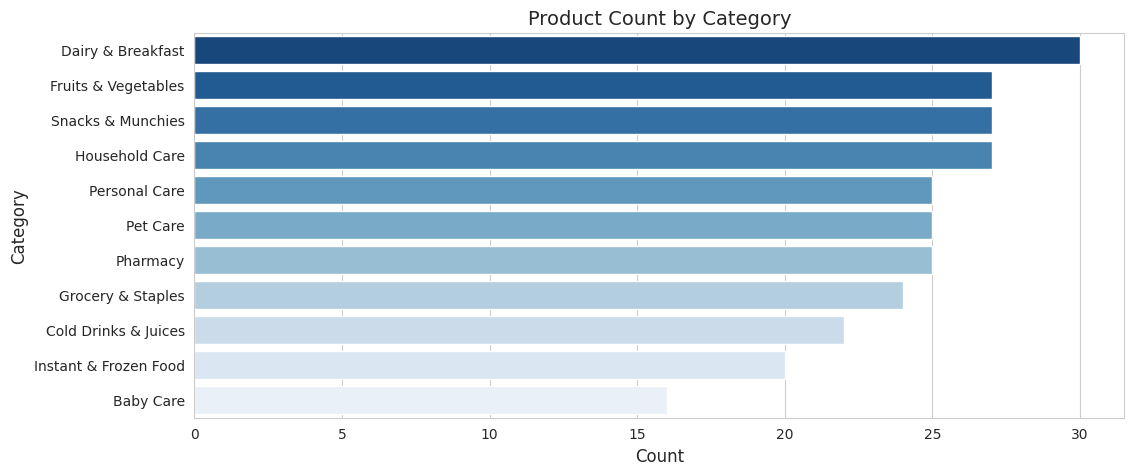

In [52]:
plt.figure(figsize=(12, 5))
sns.countplot(data=df, y="category", order=df["category"].value_counts().index, palette="Blues_r")
plt.title("Product Count by Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

12. Brand-wise Product Count (Top 10 Brands) 

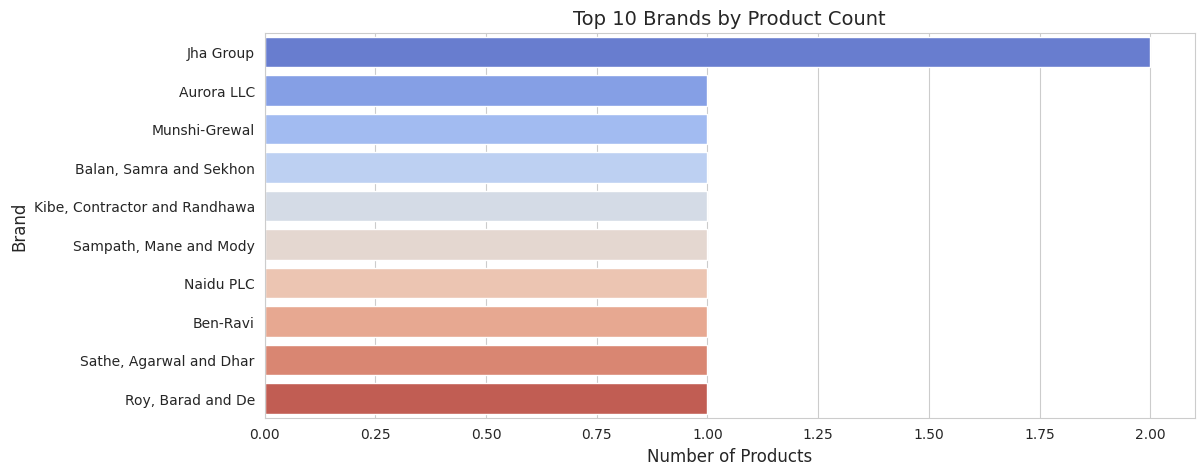

In [53]:
top_brands = df["brand"].value_counts().head(10)
plt.figure(figsize=(12, 5))
sns.barplot(x=top_brands.values, y=top_brands.index, palette="coolwarm")
plt.title("Top 10 Brands by Product Count")
plt.xlabel("Number of Products")
plt.ylabel("Brand")
plt.show()

13. Price vs MRP Scatter Plot 

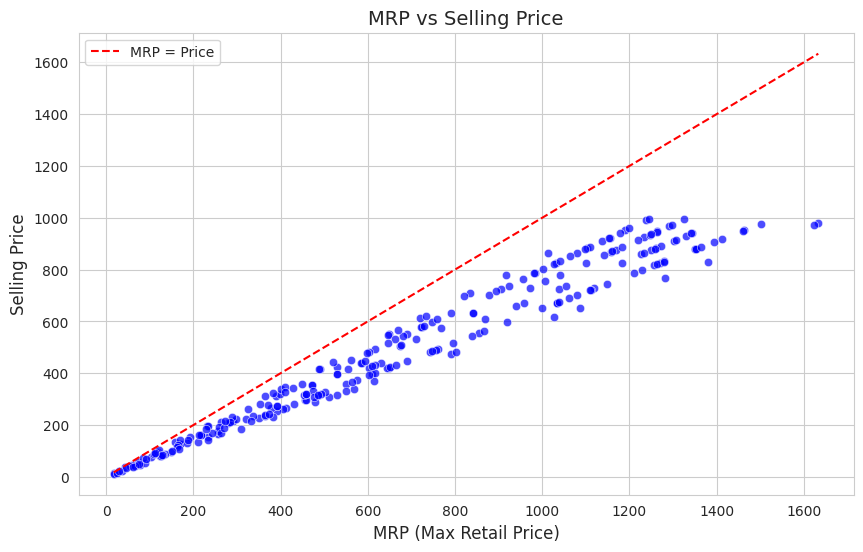

In [54]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="mrp", y="price", alpha=0.7, color="blue")
plt.plot([df["mrp"].min(), df["mrp"].max()], [df["mrp"].min(), df["mrp"].max()], "r--", label="MRP = Price")
plt.title("MRP vs Selling Price")
plt.xlabel("MRP (Max Retail Price)")
plt.ylabel("Selling Price")
plt.legend()
plt.show()

 14. Margin Percentage Distribution 

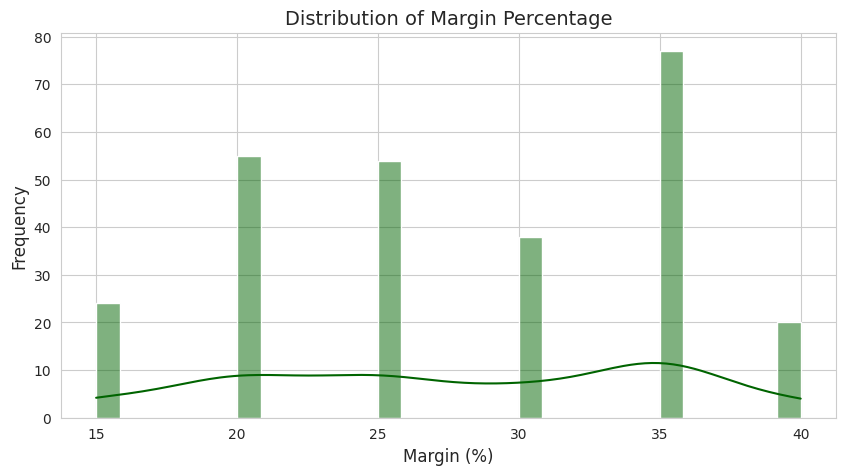

In [55]:
plt.figure(figsize=(10, 5))
sns.histplot(df["margin_percentage"], bins=30, kde=True, color="darkgreen")
plt.title("Distribution of Margin Percentage")
plt.xlabel("Margin (%)")
plt.ylabel("Frequency")
plt.show()

15. Shelf Life Distribution

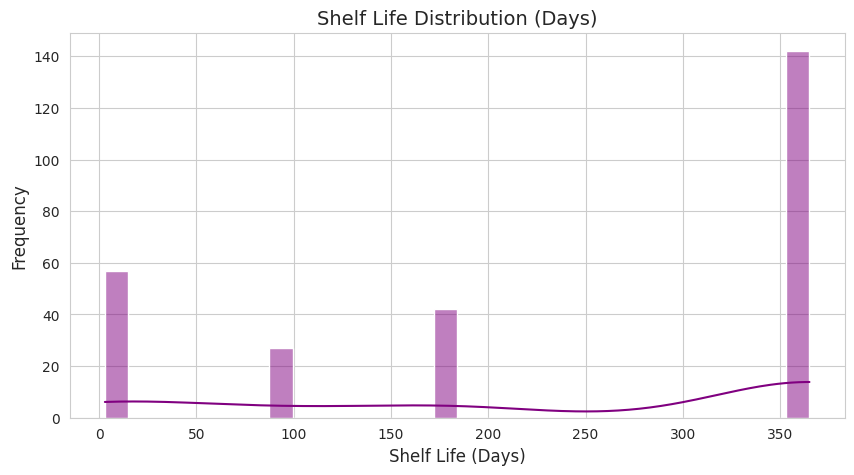

In [56]:
plt.figure(figsize=(10, 5))
sns.histplot(df["shelf_life_days"], bins=30, kde=True, color="purple")
plt.title("Shelf Life Distribution (Days)")
plt.xlabel("Shelf Life (Days)")
plt.ylabel("Frequency")
plt.show()

16. Min vs Max Stock Level

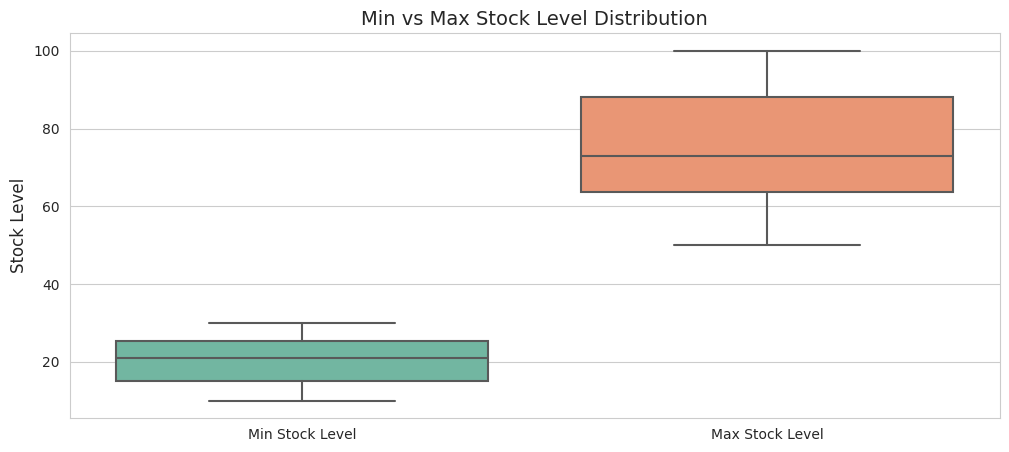

In [57]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df[["min_stock_level", "max_stock_level"]], palette="Set2")
plt.title("Min vs Max Stock Level Distribution")
plt.ylabel("Stock Level")
plt.xticks(ticks=[0, 1], labels=["Min Stock Level", "Max Stock Level"])
plt.show()

In [64]:
import time
from sklearn.utils.multiclass import type_of_target
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier,VotingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, HuberRegressor, SGDRegressor, PassiveAggressiveRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, BaggingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge, SGDRegressor, HuberRegressor, PassiveAggressiveRegressor, TheilSenRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [66]:
# Handle Missing Values
df.dropna(inplace=True)

# Label Encoding for Categorical Features
encoder_category = LabelEncoder()
encoder_brand = LabelEncoder()
df["product_name"]=encoder_category.fit_transform(df["product_name"])
df["category"] = encoder_category.fit_transform(df["category"])
df["brand"] = encoder_brand.fit_transform(df["brand"])
df.corr()

,product_id,product_name,category,brand,price,mrp,margin_percentage,shelf_life_days,min_stock_level,max_stock_level
product_id,1.000000,0.006486,0.064678,-0.064160,-0.113843,-0.100528,0.033336,-0.008379,-0.041629,-0.028918
product_name,0.006486,1.000000,0.214646,-0.040371,-0.040890,-0.062661,-0.171362,0.318521,0.000102,-0.036628
category,0.064678,0.214646,1.000000,-0.063333,-0.037938,0.017706,0.344581,0.264315,0.028164,-0.014915
brand,-0.064160,-0.040371,-0.063333,1.000000,-0.059217,-0.061999,-0.036675,-0.051104,-0.010178,-0.164690
price,-0.113843,-0.040890,-0.037938,-0.059217,1.000000,0.982195,-0.062633,-0.058469,-0.040858,-0.006327
mrp,-0.100528,-0.062661,0.017706,-0.061999,0.982195,1.000000,0.097916,-0.043183,-0.054902,-0.015554
margin_percentage,0.033336,-0.171362,0.344581,-0.036675,-0.062633,0.097916,1.000000,0.009517,-0.047959,-0.058727
shelf_life_days,-0.008379,0.318521,0.264315,-0.051104,-0.058469,-0.043183,0.009517,1.000000,0.041920,-0.003718
min_stock_level,-0.041629,0.000102,0.028164,-0.010178,-0.040858,-0.054902,-0.047959,0.041920,1.000000,0.131067
max_stock_level,-0.028918,-0.036628,-0.014915,-0.164690,-0.006327,-0.015554,-0.058727,-0.003718,0.131067,1.000000


**Feature Engineering**

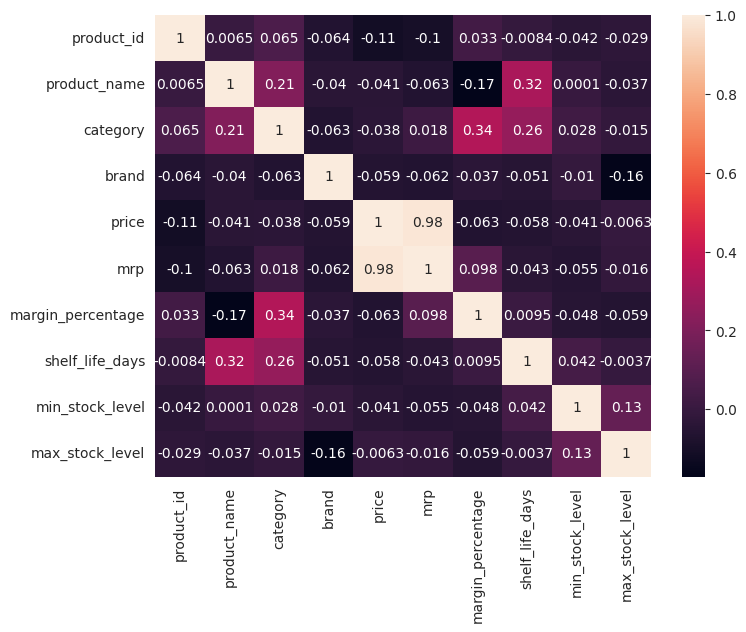

In [67]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(),annot=True)
plt.show()

**Machine Learning Models**

**Models**

In [68]:
models = {
    "Random Forest Regressor": RandomForestRegressor(),
    "Gradient Boosting Regressor": GradientBoostingRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "Bagging Regressor": BaggingRegressor(),
    "Extra Trees Regressor": ExtraTreesRegressor(),
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "ElasticNet Regression": ElasticNet(),
    "Bayesian Ridge Regression": BayesianRidge(),
    "SGD Regressor": SGDRegressor(),
    "Huber Regressor": HuberRegressor(),
    "Passive Aggressive Regressor": PassiveAggressiveRegressor(),
    "TheilSen Regressor": TheilSenRegressor(),
    "Decision Tree Regressor": DecisionTreeRegressor(),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(),
}

**Price Prediction Model**

In [79]:
x = df.drop(columns=["product_id", "product_name", "price"]) 
y=df["price"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

**Results**

In [80]:
metrics = {
    'Model': [],
    'Accuracy': []
}
for name,model in models.items():
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    acc = r2_score(y_test, y_pred)
    metrics['Model'].append(name)
    metrics['Accuracy'].append(acc * 100)
    print(f"Model: {name}")
    print(f"Accuracy: {acc*100}")
    print("-" * 30)

Model: Random Forest Regressor
Accuracy: 98.95114023671422
------------------------------
Model: Gradient Boosting Regressor
Accuracy: 99.6420052844024
------------------------------
Model: AdaBoost Regressor
Accuracy: 97.82143542400668
------------------------------
Model: Bagging Regressor
Accuracy: 98.37947563249391
------------------------------
Model: Extra Trees Regressor
Accuracy: 99.75752075444484
------------------------------
Model: Linear Regression
Accuracy: 98.77516267952167
------------------------------
Model: Ridge Regression
Accuracy: 98.80368129059113
------------------------------
Model: Lasso Regression
Accuracy: 98.82443569931085
------------------------------
Model: ElasticNet Regression
Accuracy: 88.96998643185151
------------------------------
Model: Bayesian Ridge Regression
Accuracy: 98.7771485677495
------------------------------
Model: SGD Regressor
Accuracy: 98.77738872926851
------------------------------
Model: Huber Regressor
Accuracy: 98.72164966858925


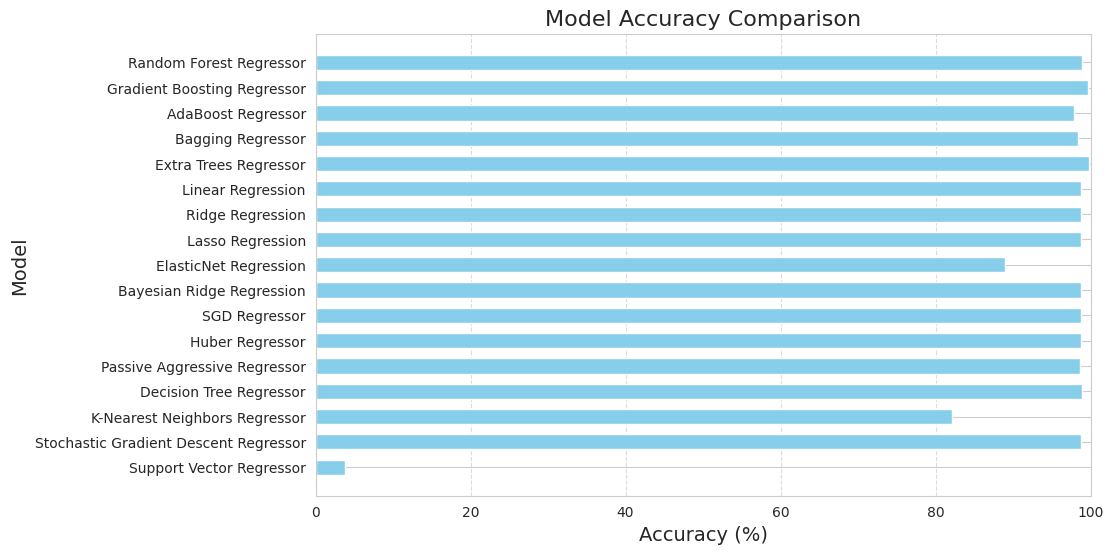

In [81]:
metrics_df = pd.DataFrame(metrics)
plt.figure(figsize=(10, 6))
plt.barh(metrics_df['Model'], metrics_df['Accuracy'], color='skyblue', height=0.6) 
plt.title('Model Accuracy Comparison', fontsize=16)
plt.xlabel('Accuracy (%)', fontsize=14)
plt.ylabel('Model', fontsize=14)
plt.xlim(0, 100)  
plt.grid(axis='x', linestyle='--', alpha=0.7) 
plt.gca().invert_yaxis() 
plt.show()

**Order Total Prediction Model**

In [82]:
features_orders = ["store_id", "customer_id", "delivery_partner_id"]
target_orders = "order_total"
X_orders = orders_df[features_orders]
y_orders = orders_df[target_orders]
X_train_orders, X_test_orders, y_train_orders, y_test_orders = train_test_split(X_orders, y_orders, test_size=0.2, random_state=42)

**Price Prediction Model**

In [83]:
products_df["expensive"] = (products_df["price"] > products_df["price"].median()).astype(int)
features_price = ["margin_percentage", "shelf_life_days", "min_stock_level", "max_stock_level"]
target_price = "expensive"
X_price = products_df[features_price]
y_price = products_df[target_price]
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.2, random_state=42)

In [85]:
regression_results_orders = []
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_orders, y_train_orders)
    y_pred_orders = model.predict(X_test_orders)
    mse = mean_squared_error(y_test_orders, y_pred_orders)
    r2 = r2_score(y_test_orders, y_pred_orders)
    end_time = time.time()
    regression_results_orders.append({
        "Model": name,
        "MSE": mse,
        "R2 Score": r2,
        "Time Taken (s)": end_time - start_time
    })

In [86]:
reg_results_orders = pd.DataFrame(regression_results_orders).sort_values(by="R2 Score", ascending=False)

In [87]:
reg_results_orders

,Model,MSE,R2 Score,Time Taken (s)
5,Linear Regression,1.744733e+06,1.129814e-03,0.007568
6,Ridge Regression,1.744733e+06,1.129814e-03,0.004258
8,ElasticNet Regression,1.744733e+06,1.129807e-03,0.003843
7,Lasso Regression,1.744733e+06,1.129801e-03,0.003962
9,Bayesian Ridge Regression,1.746837e+06,-7.493448e-05,0.004447
1,Gradient Boosting Regressor,1.752561e+06,-3.351791e-03,0.549216
16,Support Vector Regressor,1.755518e+06,-5.044786e-03,1.179674
2,AdaBoost Regressor,1.778423e+06,-1.815827e-02,0.085985
0,Random Forest Regressor,1.878363e+06,-7.537462e-02,1.959205
4,Extra Trees Regressor,1.912912e+06,-9.515416e-02,0.755416


**Visualization of model performance**

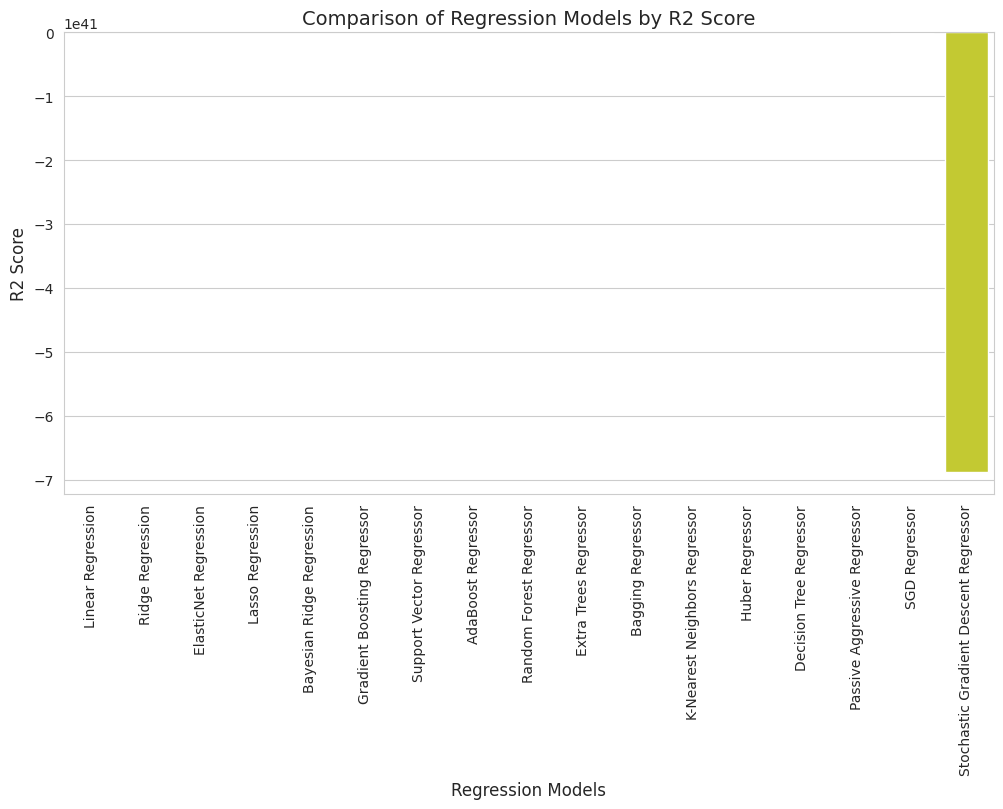

In [88]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="R2 Score", data=reg_results_orders, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Regression Models")
plt.ylabel("R2 Score")
plt.title("Comparison of Regression Models by R2 Score")
plt.show()

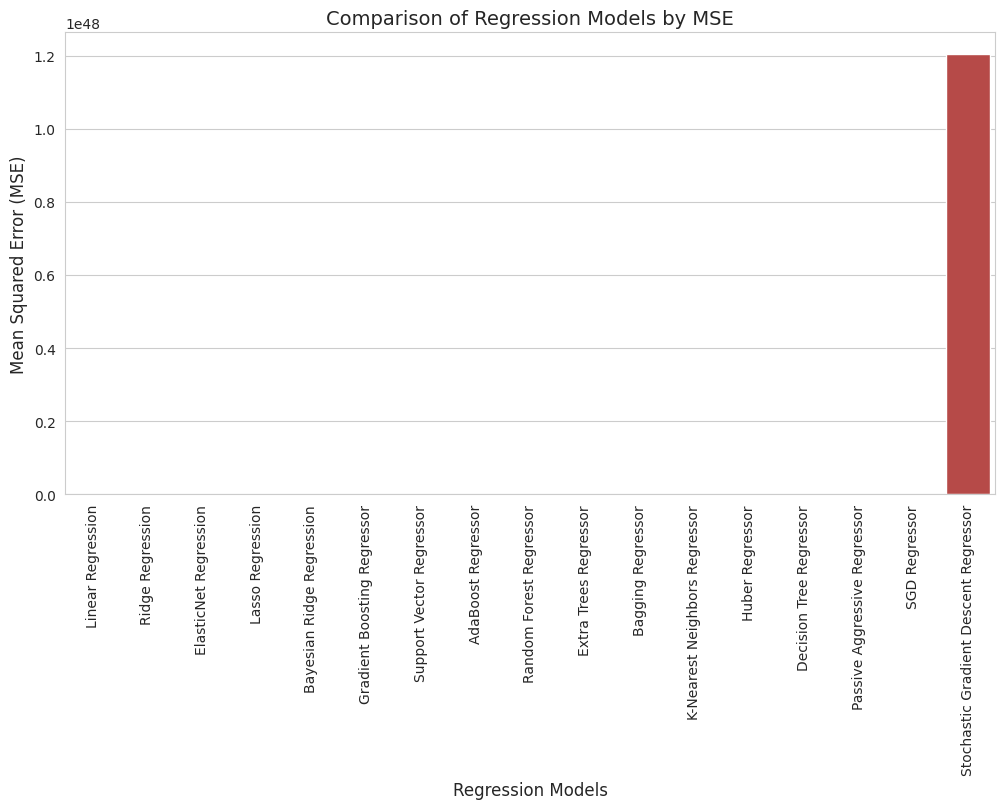

In [89]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="MSE", data=reg_results_orders, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Regression Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of Regression Models by MSE")
plt.show()

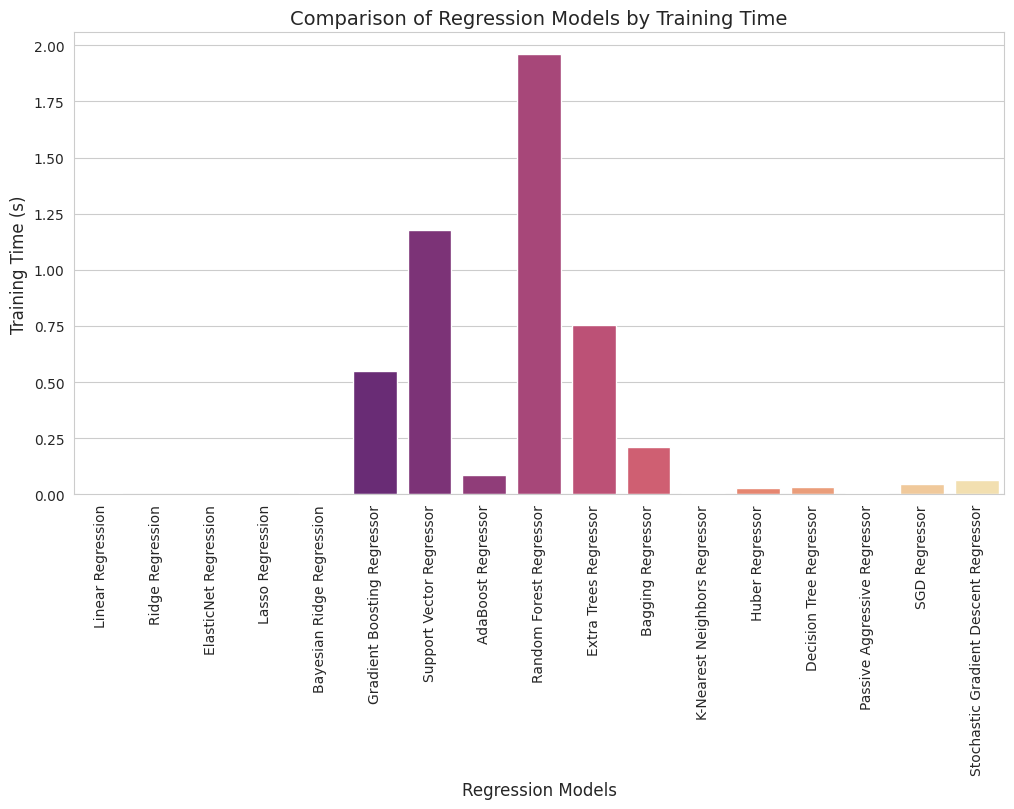

In [90]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Time Taken (s)", data=reg_results_orders, palette="magma")
plt.xticks(rotation=90)
plt.xlabel("Regression Models")
plt.ylabel("Training Time (s)")
plt.title("Comparison of Regression Models by Training Time")
plt.show()

**Train and evaluate models for price prediction**

In [92]:
regression_results_price = []
for name, model in models.items():
    start_time = time.time()
    model.fit(X_train_price, y_train_price)
    y_pred_price = model.predict(X_test_price)
    mse = mean_squared_error(y_test_price, y_pred_price)
    r2 = r2_score(y_test_price, y_pred_price)
    end_time = time.time()
    regression_results_price.append({
        "Model": name,
        "MSE": mse,
        "R2 Score": r2,
        "Time Taken (s)": end_time - start_time
    })

In [93]:
reg_results_price = pd.DataFrame(regression_results_price).sort_values(by="R2 Score", ascending=False)
reg_results_price

,Model,MSE,R2 Score,Time Taken (s)
8,ElasticNet Regression,2.517542e-01,-1.960433e-02,0.003495
7,Lasso Regression,2.517542e-01,-1.960433e-02,0.003691
9,Bayesian Ridge Regression,2.519170e-01,-2.026366e-02,0.004183
11,Huber Regressor,2.570071e-01,-4.087882e-02,0.021866
6,Ridge Regression,2.570075e-01,-4.088034e-02,0.003707
5,Linear Regression,2.570083e-01,-4.088363e-02,0.004991
2,AdaBoost Regressor,2.981211e-01,-2.073906e-01,0.017449
3,Bagging Regressor,2.982296e-01,-2.078300e-01,0.023951
0,Random Forest Regressor,3.060058e-01,-2.393233e-01,0.170863
14,K-Nearest Neighbors Regressor,3.066667e-01,-2.420000e-01,0.004149


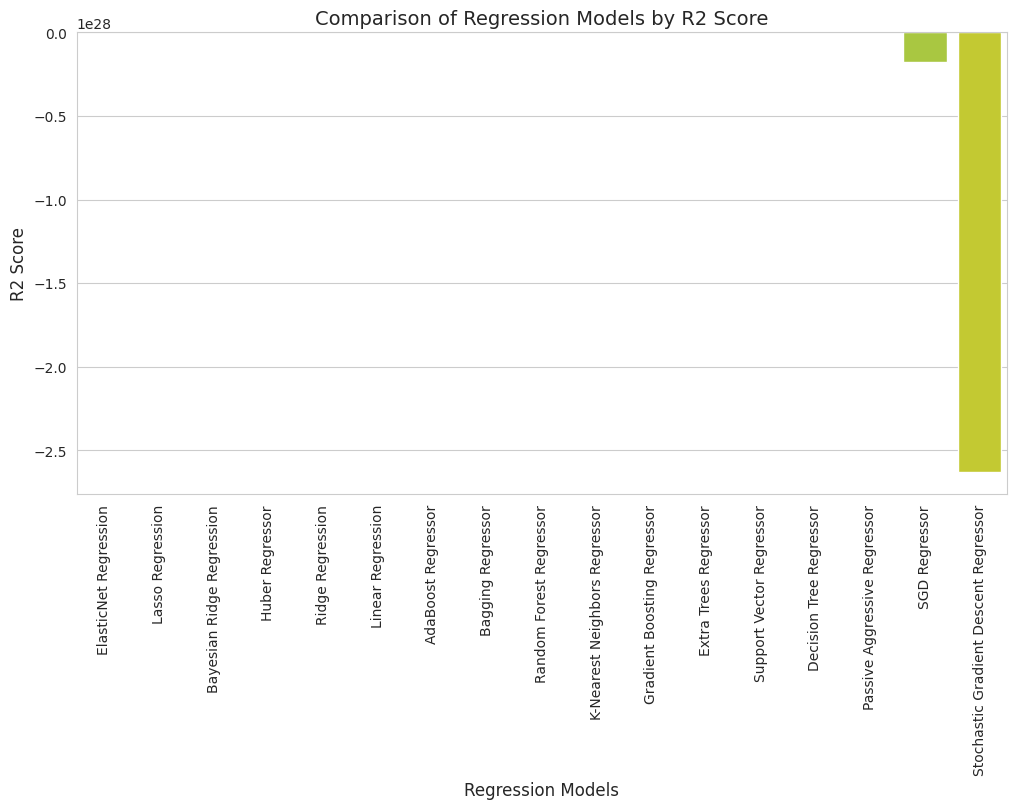

In [94]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="R2 Score", data=reg_results_price, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Regression Models")
plt.ylabel("R2 Score")
plt.title("Comparison of Regression Models by R2 Score")
plt.show()

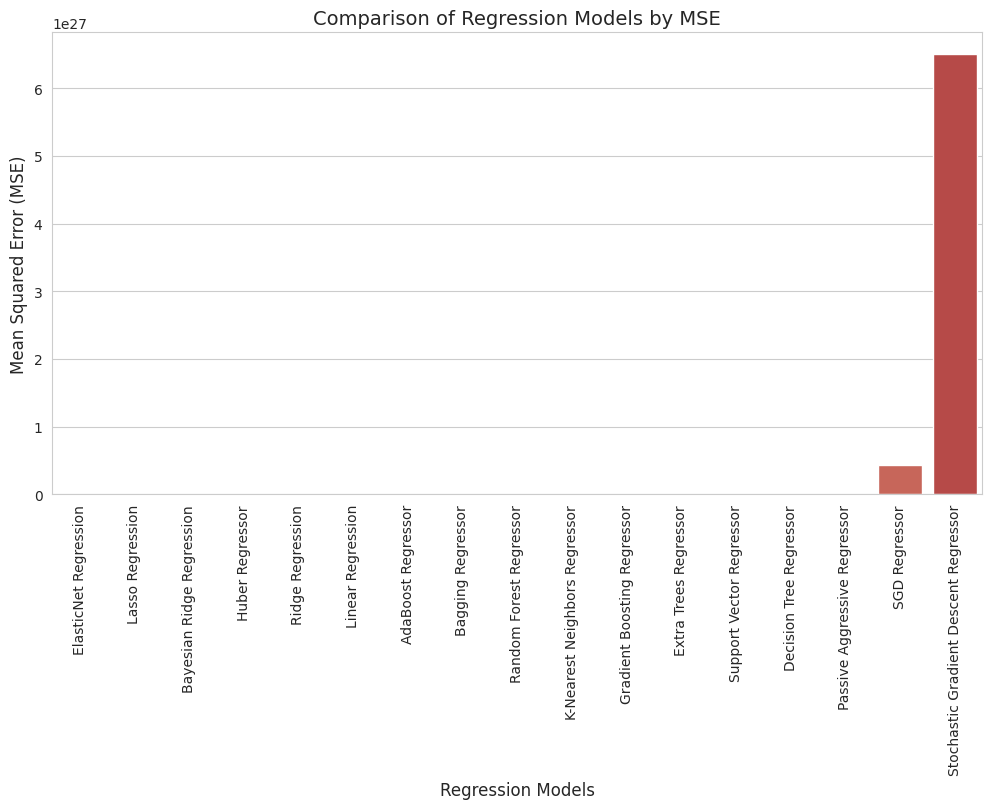

In [95]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="MSE", data=reg_results_price, palette="coolwarm")
plt.xticks(rotation=90)
plt.xlabel("Regression Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of Regression Models by MSE")
plt.show()

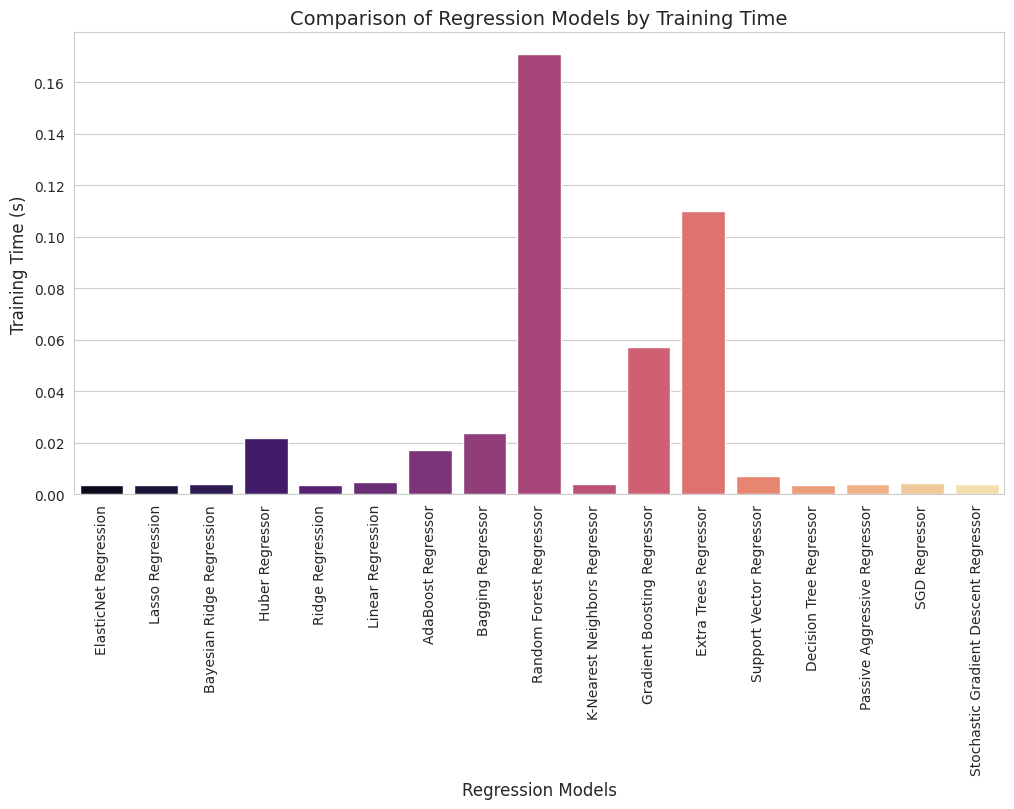

In [96]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Time Taken (s)", data=reg_results_price, palette="magma")
plt.xticks(rotation=90)
plt.xlabel("Regression Models")
plt.ylabel("Training Time (s)")
plt.title("Comparison of Regression Models by Training Time")
plt.show()

**Classification Models**

**Order Classification Model**

In [97]:
orders_df["high_value_order"] = (orders_df["order_total"] > orders_df["order_total"].median()).astype(int)
features_orders = ["store_id", "customer_id", "delivery_partner_id"]
target_orders = "high_value_order"
X_orders = orders_df[features_orders]
y_orders = orders_df[target_orders]
X_train_orders, X_test_orders, y_train_orders, y_test_orders = train_test_split(X_orders, y_orders, test_size=0.2, random_state=42)

In [98]:
classification_models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Extra Trees": RandomForestClassifier(n_estimators=200),
    "XGBoost": GradientBoostingClassifier(n_estimators=200),
    "Bagging Classifier": RandomForestClassifier(n_estimators=100, bootstrap=True),
    "CatBoost": GradientBoostingClassifier(n_estimators=300),
    "LightGBM": GradientBoostingClassifier(n_estimators=400),
    "Voting Classifier": RandomForestClassifier(n_estimators=500)
}

In [99]:
results_orders = []
for name, model in classification_models.items():
    start_time = time.time()
    model.fit(X_train_orders, y_train_orders)
    y_pred_orders = model.predict(X_test_orders)
    accuracy = accuracy_score(y_test_orders, y_pred_orders)
    end_time = time.time()
    results_orders.append({
        "Model": name,
        "Accuracy": accuracy,
        "Time Taken (s)": end_time - start_time
    })

In [100]:
clas_results_orders = pd.DataFrame(results_orders).sort_values(by="Accuracy", ascending=False)
clas_results_orders

,Model,Accuracy,Time Taken (s)
11,LightGBM,0.515,2.352822
0,Decision Tree,0.508,0.033278
2,Gradient Boosting,0.508,0.618470
10,CatBoost,0.505,1.751169
6,Naive Bayes,0.504,0.005022
8,XGBoost,0.498,1.180720
9,Bagging Classifier,0.496,0.924926
4,Support Vector Machine,0.494,1.026541
3,AdaBoost,0.492,0.228905
5,K-Nearest Neighbors,0.491,0.052547


**Plot results**

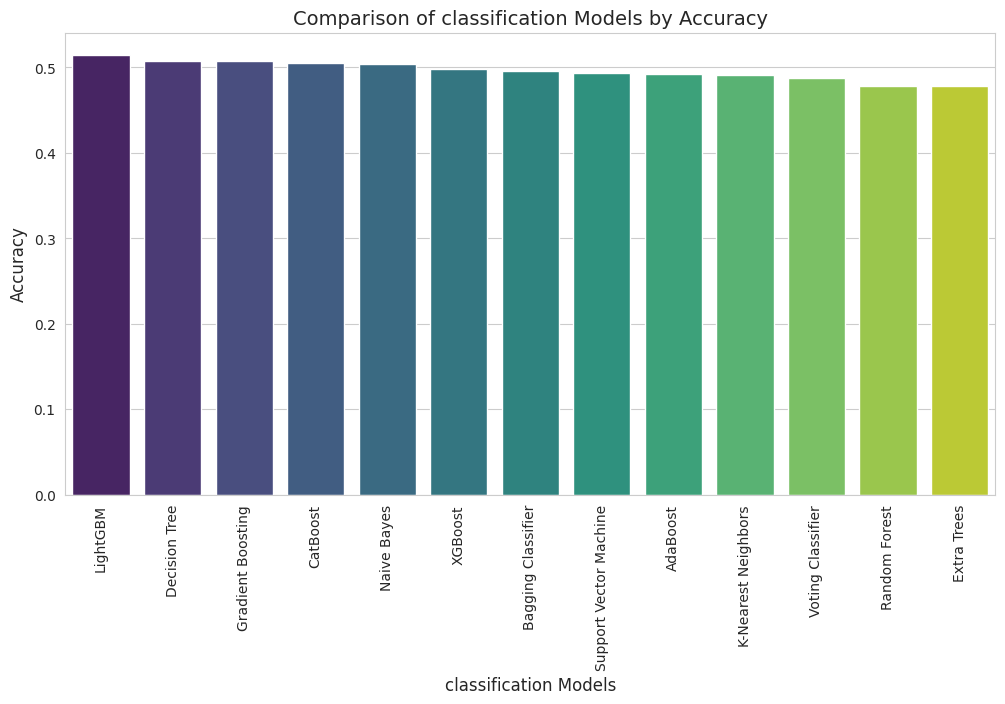

In [101]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=clas_results_orders, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("classification Models")
plt.ylabel("Accuracy")
plt.title("Comparison of classification Models by Accuracy")
plt.show()

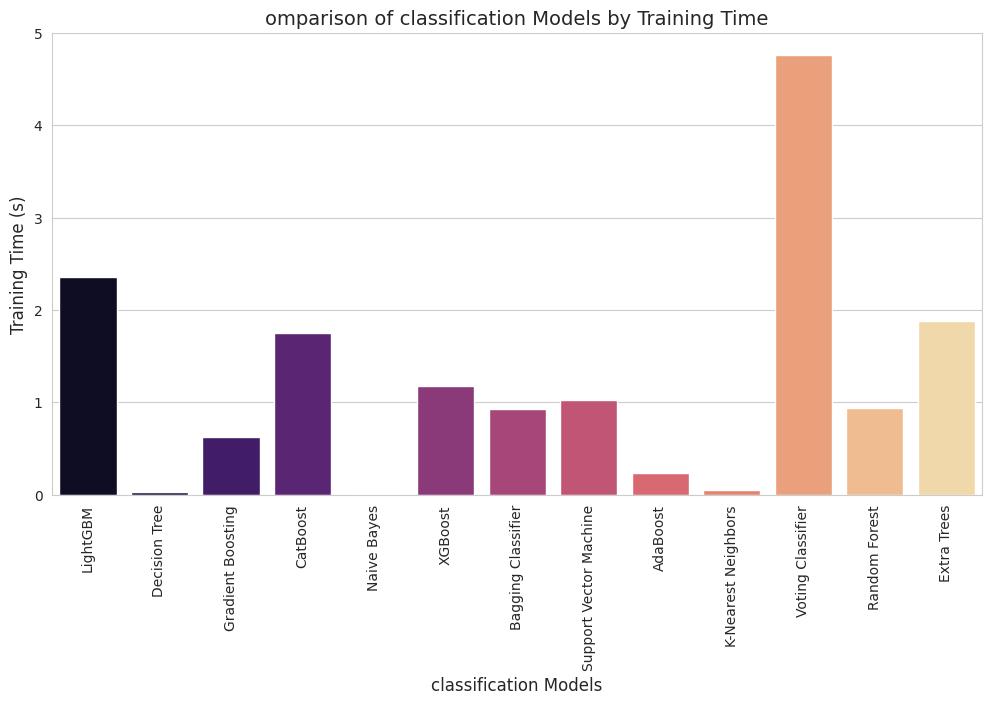

In [102]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Time Taken (s)", data=clas_results_orders, palette="magma")
plt.xticks(rotation=90)
plt.xlabel("classification Models")
plt.ylabel("Training Time (s)")
plt.title("omparison of classification Models by Training Time")
plt.show()

**Product Classification Model**

In [103]:
products_df["expensive"] = (products_df["price"] > products_df["price"].median()).astype(int)
features_price = ["margin_percentage", "shelf_life_days", "min_stock_level", "max_stock_level"]
target_price = "expensive"
X_price = products_df[features_price]
y_price = products_df[target_price]
X_train_price, X_test_price, y_train_price, y_test_price = train_test_split(X_price, y_price, test_size=0.2, random_state=42)

In [104]:
results_price = []
for name, model in classification_models.items():
    start_time = time.time()
    model.fit(X_train_price, y_train_price)
    y_pred_price = model.predict(X_test_price)
    accuracy = accuracy_score(y_test_price, y_pred_price)
    end_time = time.time()
    results_price.append({
        "Model": name,
        "Accuracy": accuracy,
        "Time Taken (s)": end_time - start_time
    })

In [105]:
clas_results_price = pd.DataFrame(results_price).sort_values(by="Accuracy", ascending=False)
clas_results_price

,Model,Accuracy,Time Taken (s)
5,K-Nearest Neighbors,0.592593,0.008604
6,Naive Bayes,0.518519,0.003968
4,Support Vector Machine,0.500000,0.007402
9,Bagging Classifier,0.500000,0.168357
0,Decision Tree,0.481481,0.006324
1,Random Forest,0.481481,0.171046
7,Extra Trees,0.481481,0.337736
3,AdaBoost,0.462963,0.085422
10,CatBoost,0.462963,0.232828
12,Voting Classifier,0.462963,0.819814


**Plot results**

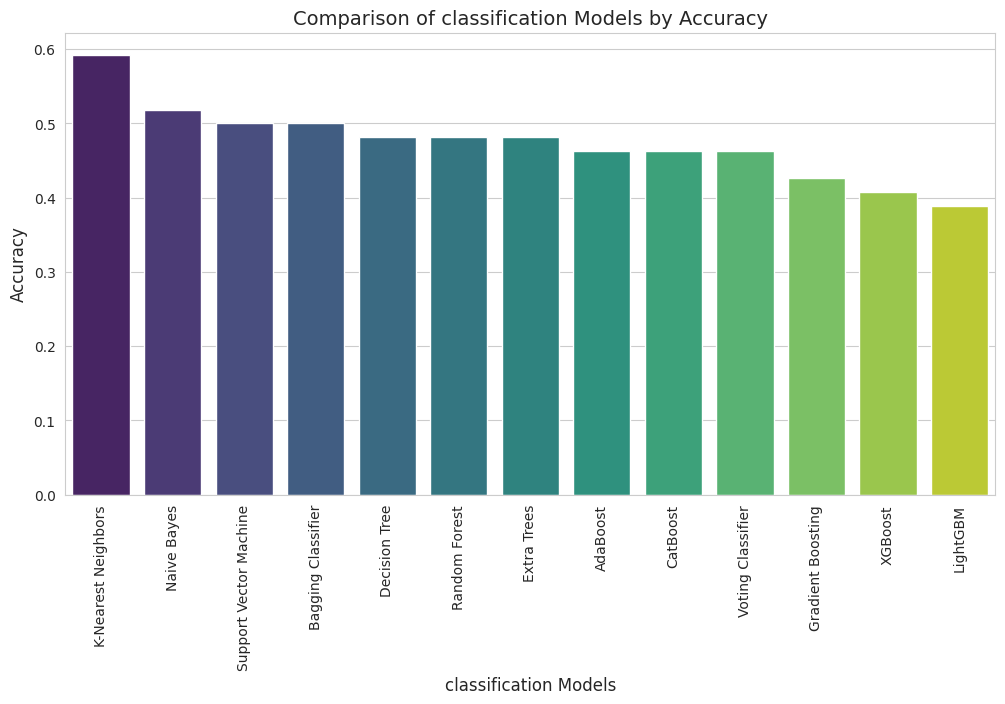

In [106]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Accuracy", data=clas_results_price, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("classification Models")
plt.ylabel("Accuracy")
plt.title("Comparison of classification Models by Accuracy")
plt.show()

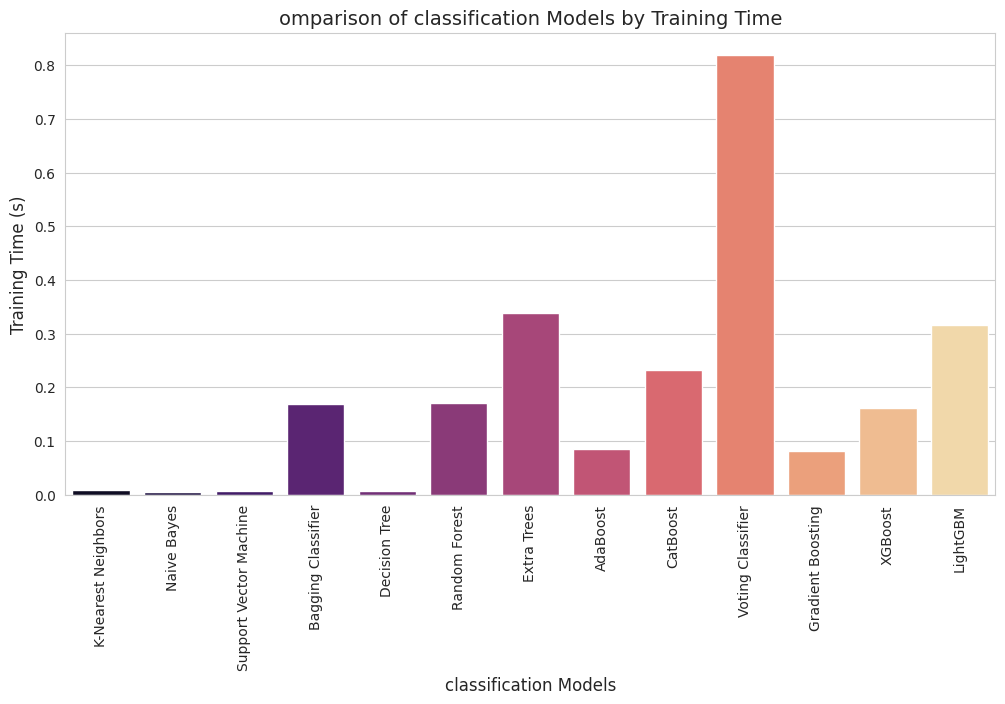

In [107]:
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="Time Taken (s)", data=clas_results_price, palette="magma")
plt.xticks(rotation=90)
plt.xlabel("classification Models")
plt.ylabel("Training Time (s)")
plt.title("omparison of classification Models by Training Time")
plt.show()

Deep Learning Models

In [108]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

In [109]:
input_shape_orders = (X_train_orders.shape[1],)
input_shape_price = (X_train_price.shape[1],)

List of deep learning models to train

In [110]:
batch_size = 64
epochs = 100

dl_models = {
    "Simple Neural Network": Sequential([
        Dense(256, activation='relu', input_shape=(X_train_orders.shape[1],)),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
    "Deep Neural Network": Sequential([
        Dense(512, activation='relu', input_shape=(X_train_orders.shape[1],)),
        BatchNormalization(),
        Dropout(0.3),
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
    "Wide & Deep Network": Sequential([
        Dense(1024, activation='relu', input_shape=(X_train_orders.shape[1],)),
        BatchNormalization(),    
        Dropout(0.3),
        Dense(512, activation='relu'),
        Dropout(0.3),
        Dense(256, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
    "Minimal NN": Sequential([
        Dense(128, activation='relu', input_shape=(X_train_orders.shape[1],)),
        Dense(1, activation='sigmoid')
    ]),
    "Deep CNN": Sequential([
        Dense(512, activation='relu', input_shape=(X_train_orders.shape[1],)),
        BatchNormalization(),
        Dropout(0.2),
        Dense(256, activation='relu'),
        Dropout(0.2),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ]),
}

**Train Deep Learning Models**

In [111]:
results_orders = []
for name, model in dl_models.items():
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    start_time = time.time()
    model.fit(X_train_orders, y_train_orders, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(X_test_orders, y_test_orders))
    end_time = time.time()
    training_time = end_time - start_time
    y_pred_orders = (model.predict(X_test_orders) > 0.5).astype(int)
    accuracy = accuracy_score(y_test_orders, y_pred_orders)
    results_orders.append({"Model": name, "Accuracy": accuracy, "Training Time (s)": training_time})

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [112]:
results_dl_orders = pd.DataFrame(results_orders)
results_dl_orders

,Model,Accuracy,Training Time (s)
0,Simple Neural Network,0.515,32.072352
1,Deep Neural Network,0.490,57.277421
2,Wide & Deep Network,0.491,106.989168
3,Minimal NN,0.508,19.149333
4,Deep CNN,0.473,54.992963


**Visualization Results**

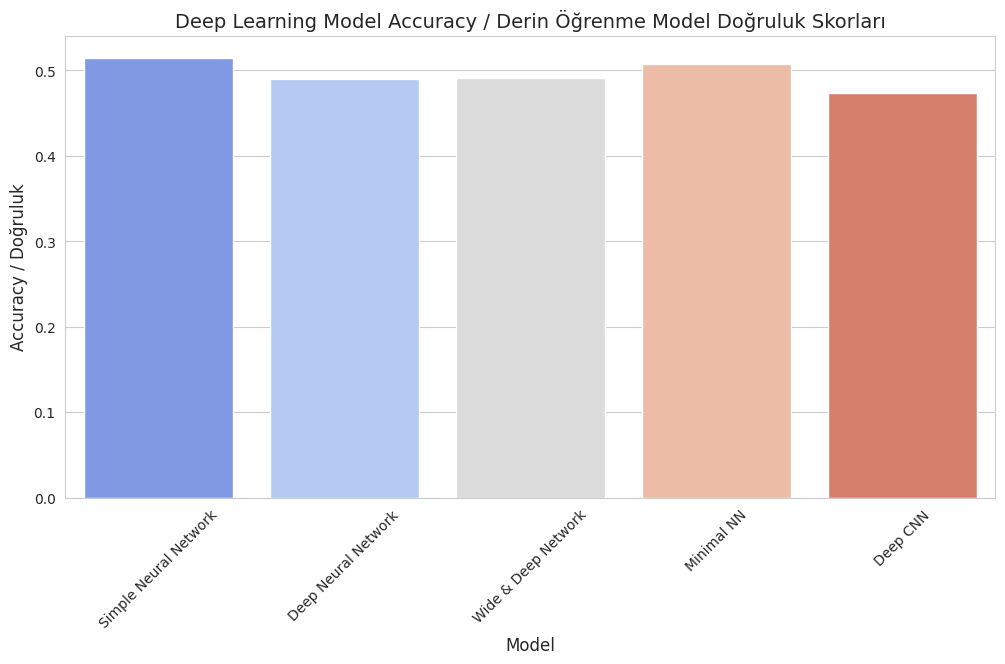

In [113]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results_dl_orders["Model"], y=results_dl_orders["Accuracy"], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Deep Learning Model Accuracy / Derin Öğrenme Model Doğruluk Skorları")
plt.xlabel("Model")
plt.ylabel("Accuracy / Doğruluk")
plt.show()

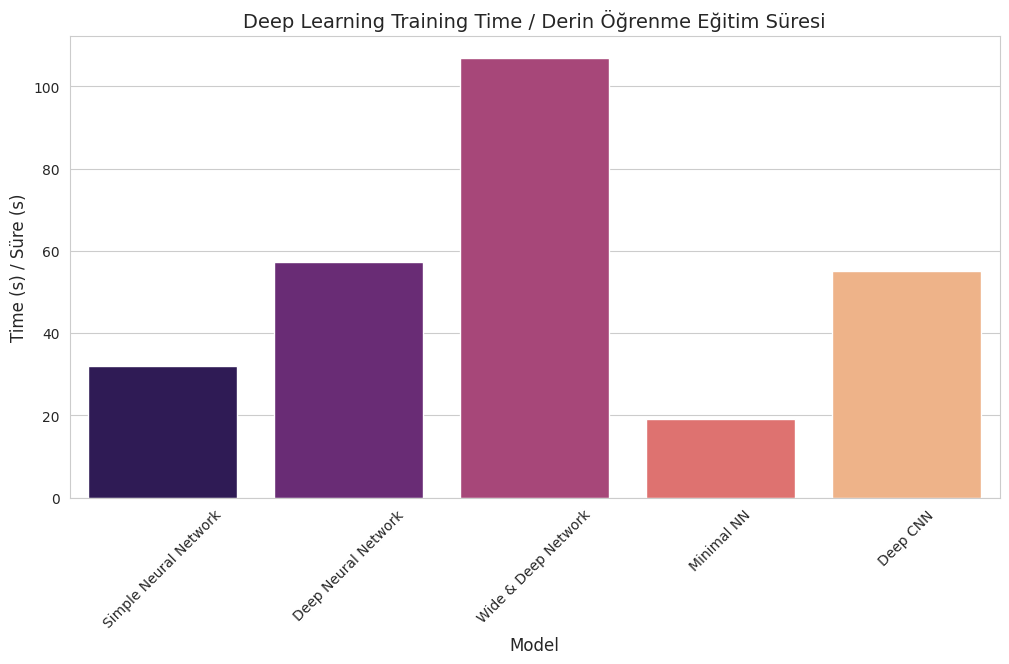

In [114]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results_dl_orders["Model"], y=results_dl_orders["Training Time (s)"], palette="magma")
plt.xticks(rotation=45)
plt.title("Deep Learning Training Time / Derin Öğrenme Eğitim Süresi")
plt.xlabel("Model")
plt.ylabel("Time (s) / Süre (s)")
plt.show()

**Deep learning Price**

In [115]:
batch_size = 64
epochs = 100
def build_model(input_shape):
    return Sequential([
        Dense(256, activation='relu', input_shape=input_shape),
        BatchNormalization(),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
dl_models_price = {name: build_model(input_shape_price) for name in ["Simple Neural Network", "Deep Neural Network", "Wide & Deep Network", "Minimal NN", "Deep CNN"]}

In [116]:
results_dl_price = []
for name, model in dl_models_price.items():
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    start_time = time.time()
    model.fit(X_train_price, y_train_price, epochs=epochs, batch_size=batch_size, verbose=0, validation_data=(X_test_price, y_test_price))
    end_time = time.time()
    training_time = end_time - start_time
    y_pred_price = (model.predict(X_test_price) > 0.5).astype(int)
    accuracy = accuracy_score(y_test_price, y_pred_price)
    results_dl_price.append({"Model": name, "Accuracy": accuracy, "Training Time (s)": training_time})

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [117]:
results_dl_price = pd.DataFrame(results_dl_price)
results_dl_price

,Model,Accuracy,Training Time (s)
0,Simple Neural Network,0.555556,8.414834
1,Deep Neural Network,0.444444,8.596924
2,Wide & Deep Network,0.462963,8.605249
3,Minimal NN,0.462963,8.795248
4,Deep CNN,0.537037,8.532490


**Visualization Results**

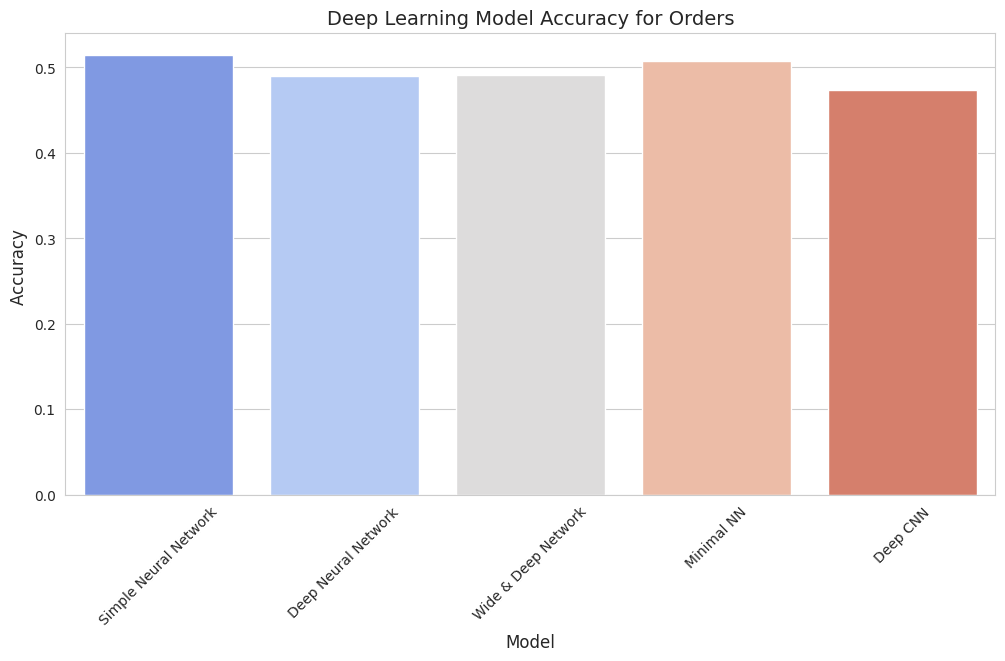

In [118]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results_dl_orders["Model"], y=results_dl_orders["Accuracy"], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Deep Learning Model Accuracy for Orders")
plt.xlabel("Model")
plt.ylabel("Accuracy ")
plt.show()

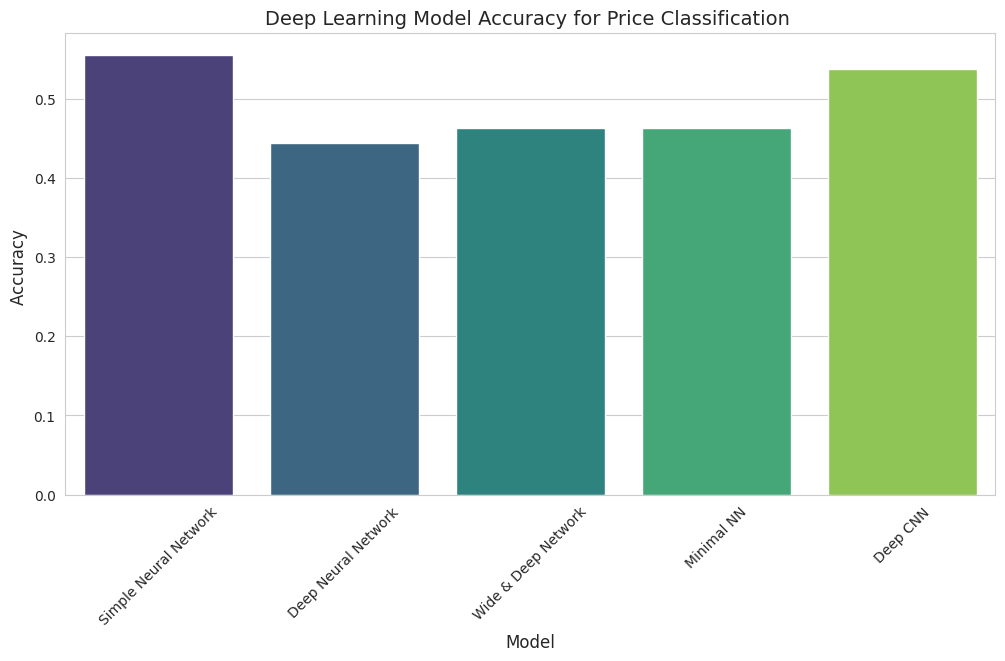

In [119]:
plt.figure(figsize=(12, 6))
sns.barplot(x=results_dl_price["Model"], y=results_dl_price["Accuracy"], palette="viridis")
plt.xticks(rotation=45)
plt.title("Deep Learning Model Accuracy for Price Classification ")
plt.xlabel("Model")
plt.ylabel("Accuracy ")
plt.show()